In [1]:
#59. Discuss the implementation of naïve string-matching algorithm.
#Given text string with length n and a pattern with length m, the task is to prints all occurrences of pattern in text.
# Python3 program for Naive Pattern
# Searching algorithm
	
def search(pat, txt):
	M = len(pat)
	N = len(txt)

	# A loop to slide pat[] one by one */
	for i in range(N - M + 1):
		j = 0

		# For current index i, check
		# for pattern match */
		while(j < M):
			if (txt[i + j] != pat[j]):
				break
			j += 1

		if (j == M):
			print("Pattern found at index ", i)


# Driver's Code
if __name__ == '__main__':
	txt = "AABAACAADAABAAABAA"
	pat = "AABA"
	
	# Function call
	search(pat, txt)

# This code is contributed
# by PrinciRaj1992


Pattern found at index  0
Pattern found at index  9
Pattern found at index  13


In [2]:
#60.  Discuss the implementation of Rabin-Karp string matching algorithm.
#Like the Naive Algorithm, the Rabin-Karp algorithm also check every substring. But unlike the Naive algorithm, 
# the Rabin Karp algorithm matches the hash value of the pattern with the hash value of the current substring of text,
# and if the hash values match then only it starts matching individual characters. So Rabin Karp algorithm needs to calculate 
# hash values for the following strings.
# Pattern itself
# All the substrings of the text of length m which is the size of pattern.

# Following program is the python implementation of
# Rabin Karp Algorithm given in CLRS book

# d is the number of characters in the input alphabet
d = 256

# pat -> pattern
# txt -> text
# q -> A prime number


def search(pat, txt, q):
	M = len(pat)
	N = len(txt)
	i = 0
	j = 0
	p = 0 # hash value for pattern
	t = 0 # hash value for txt
	h = 1

	# The value of h would be "pow(d, M-1)%q"
	for i in range(M-1):
		h = (h*d) % q

	# Calculate the hash value of pattern and first window
	# of text
	for i in range(M):
		p = (d*p + ord(pat[i])) % q
		t = (d*t + ord(txt[i])) % q

	# Slide the pattern over text one by one
	for i in range(N-M+1):
		# Check the hash values of current window of text and
		# pattern if the hash values match then only check
		# for characters one by one
		if p == t:
			# Check for characters one by one
			for j in range(M):
				if txt[i+j] != pat[j]:
					break
				else:
					j += 1

			# if p == t and pat[0...M-1] = txt[i, i+1, ...i+M-1]
			if j == M:
				print("Pattern found at index " + str(i))

		# Calculate hash value for next window of text: Remove
		# leading digit, add trailing digit
		if i < N-M:
			t = (d*(t-ord(txt[i])*h) + ord(txt[i+M])) % q
#   
			# We might get negative values of t, converting it to
			# positive
			if t < 0:
				t = t+q


# Driver Code
if __name__ == '__main__':
	txt = "GEEKS FOR GEEKS"
	pat = "GEEK"

	# A prime number
	q = 101

	# Function Call
	search(pat, txt, q)

# This code is contributed by Bhavya Jain



Pattern found at index 0
Pattern found at index 10


In [3]:
# 61.  Discuss the implementation of KMP string matching algorithm.

# Python3 program for KMP Algorithm


def KMPSearch(pat, txt):
	M = len(pat)
	N = len(txt)

	# create lps[] that will hold the longest prefix suffix
	# values for pattern
	lps = [0]*M
	j = 0 # index for pat[]

	# Preprocess the pattern (calculate lps[] array)
	computeLPSArray(pat, M, lps)

	i = 0 # index for txt[]
	while (N - i) >= (M - j):
		if pat[j] == txt[i]:
			i += 1
			j += 1

		if j == M:
			print("Found pattern at index " + str(i-j))
			j = lps[j-1]

		# mismatch after j matches
		elif i < N and pat[j] != txt[i]:
			# Do not match lps[0..lps[j-1]] characters,
			# they will match anyway
			if j != 0:
				j = lps[j-1]
			else:
				i += 1


# Function to compute LPS array
def computeLPSArray(pat, M, lps):
	len = 0 # length of the previous longest prefix suffix

	lps[0] = 0 # lps[0] is always 0
	i = 1

	# the loop calculates lps[i] for i = 1 to M-1
	while i < M:
		if pat[i] == pat[len]:
			len += 1
			lps[i] = len
			i += 1
		else:
			# This is tricky. Consider the example.
			# AAACAAAA and i = 7. The idea is similar
			# to search step.
			if len != 0:
				len = lps[len-1]

				# Also, note that we do not increment i here
			else:
				lps[i] = 0
				i += 1


# Driver code
if __name__ == '__main__':
	txt = "ABABDABACDABABCABAB"
	pat = "ABABCABAB"
	KMPSearch(pat, txt)

# This code is contributed by Bhavya Jain



Found pattern at index 10


In [4]:
# 62. Discuss the implementation of Automata based string matching algorithm.
# Idea of this approach is to build finite automata to scan text T for finding all occurrences of pattern P.
#  This approach examines each character of text exactly once to find the pattern. Thus it takes linear time for matching 
# but preprocessing time may be large.
# It is defined by tuple M = {Q, Σ, q, F, d} Where Q = Set of States in finite automata

# Python program for Finite Automata 
# Pattern searching Algorithm

NO_OF_CHARS = 256

def getNextState(pat, M, state, x):
	'''
	calculate the next state 
	'''

	# If the character c is same as next character 
	# in pattern, then simply increment state

	if state < M and x == ord(pat[state]):
		return state+1

	i=0
	# ns stores the result which is next state

	# ns finally contains the longest prefix 
	# which is also suffix in "pat[0..state-1]c"

	# Start from the largest possible value and 
	# stop when you find a prefix which is also suffix
	for ns in range(state,0,-1):
		if ord(pat[ns-1]) == x:
			while(i<ns-1):
				if pat[i] != pat[state-ns+1+i]:
					break
				i+=1
			if i == ns-1:
				return ns 
	return 0

def computeTF(pat, M):
	'''
	This function builds the TF table which 
	represents Finite Automata for a given pattern
	'''
	global NO_OF_CHARS

	TF = [[0 for i in range(NO_OF_CHARS)]\
		for _ in range(M+1)]

	for state in range(M+1):
		for x in range(NO_OF_CHARS):
			z = getNextState(pat, M, state, x)
			TF[state][x] = z

	return TF

def search(pat, txt):
	'''
	Prints all occurrences of pat in txt
	'''
	global NO_OF_CHARS
	M = len(pat)
	N = len(txt)
	TF = computeTF(pat, M) 

	# Process txt over FA.
	state=0
	for i in range(N):
		state = TF[state][ord(txt[i])]
		if state == M:
			print("Pattern found at index: {}".\
				format(i-M+1))

# Driver program to test above function		 
def main():
	txt = "AABAACAADAABAAABAA"
	pat = "AABA"
	search(pat, txt)

if __name__ == '__main__':
	main()

# This code is contributed by Atul Kumar


Pattern found at index: 0
Pattern found at index: 9
Pattern found at index: 13


In [5]:
# 63.  Implement the Huffman algorithm for string compression. 
# A Huffman Tree Node 
import heapq 


class node: 
	def __init__(self, freq, symbol, left=None, right=None): 
		# frequency of symbol 
		self.freq = freq 
		# symbol name (character) 
		self.symbol = symbol 
		# node left of current node 
		self.left = left 
		# node right of current node 
		self.right = right 
		# tree direction (0/1) 
		self.huff = '' 

	def __lt__(self, nxt): 
		return self.freq < nxt.freq 


# utility function to print huffman 
# codes for all symbols in the newly 
# created Huffman tree 
def printNodes(node, val=''): 

	# huffman code for current node 
	newVal = val + str(node.huff) 

	# if node is not an edge node 
	# then traverse inside it 
	if(node.left): 
		printNodes(node.left, newVal) 
	if(node.right): 
		printNodes(node.right, newVal) 

		# if node is edge node then 
		# display its huffman code 
	if(not node.left and not node.right): 
		print(f"{node.symbol} -> {newVal}") 


# characters for huffman tree 
chars = ['a', 'b', 'c', 'd', 'e', 'f'] 

# frequency of characters 
freq = [5, 9, 12, 13, 16, 45] 

# list containing unused nodes 
nodes = [] 

# converting characters and frequencies 
# into huffman tree nodes 
for x in range(len(chars)): 
	heapq.heappush(nodes, node(freq[x], chars[x])) 

while len(nodes) > 1: 

	# sort all the nodes in ascending order 
	# based on their frequency 
	left = heapq.heappop(nodes) 
	right = heapq.heappop(nodes) 

	# assign directional value to these nodes 
	left.huff = 0
	right.huff = 1

	# combine the 2 smallest nodes to create 
	# new node as their parent 
	newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right) 

	heapq.heappush(nodes, newNode) 

# Huffman Tree is ready! 
printNodes(nodes[0]) 


f -> 0
c -> 100
d -> 101
a -> 1100
b -> 1101
e -> 111


In [6]:
# # 64. Discuss the implementation of Tries. 
# Trie is a type of k-ary search tree used for storing and searching a specific key from a set. 
# Using Trie, search complexities can be brought to optimal limit (key length). 
# Python program for insert and search
# operation in a Trie

class TrieNode:
	
	# Trie node class
	def __init__(self):
		self.children = [None]*26

		# isEndOfWord is True if node represent the end of the word
		self.isEndOfWord = False

class Trie:
	
	# Trie data structure class
	def __init__(self):
		self.root = self.getNode()

	def getNode(self):
	
		# Returns new trie node (initialized to NULLs)
		return TrieNode()

	def _charToIndex(self,ch):
		
		# private helper function
		# Converts key current character into index
		# use only 'a' through 'z' and lower case
		
		return ord(ch)-ord('a')


	def insert(self,key):
		
		# If not present, inserts key into trie
		# If the key is prefix of trie node, 
		# just marks leaf node
		pCrawl = self.root
		length = len(key)
		for level in range(length):
			index = self._charToIndex(key[level])

			# if current character is not present
			if not pCrawl.children[index]:
				pCrawl.children[index] = self.getNode()
			pCrawl = pCrawl.children[index]

		# mark last node as leaf
		pCrawl.isEndOfWord = True

	def search(self, key):
		
		# Search key in the trie
		# Returns true if key presents 
		# in trie, else false
		pCrawl = self.root
		length = len(key)
		for level in range(length):
			index = self._charToIndex(key[level])
			if not pCrawl.children[index]:
				return False
			pCrawl = pCrawl.children[index]

		return pCrawl.isEndOfWord

# driver function
def main():

	# Input keys (use only 'a' through 'z' and lower case)
	keys = ["the","a","there","anaswe","any",
			"by","their"]
	output = ["Not present in trie",
			"Present in trie"]

	# Trie object
	t = Trie()

	# Construct trie
	for key in keys:
		t.insert(key)

	# Search for different keys
	print("{} ---- {}".format("the",output[t.search("the")]))
	print("{} ---- {}".format("these",output[t.search("these")]))
	print("{} ---- {}".format("their",output[t.search("their")]))
	print("{} ---- {}".format("thaw",output[t.search("thaw")]))

if __name__ == '__main__':
	main()

# This code is contributed by Atul Kumar (www.facebook.com/atul.kr.007)


the ---- Present in trie
these ---- Not present in trie
their ---- Present in trie
thaw ---- Not present in trie


In [7]:
#66. Discuss the implementation of a stack using two queues.
#A Stack can be implemented using two queues.
#Let Stack to be implemented be ‘s’ and queues used to implement are ‘q1’ and ‘q2’. Stack ‘s’ can be implemented in two ways:
#Implement Stack using Queues By making push() operation costly:

# Program to implement a stack using
# two queue
from _collections import deque


class Stack:

	def __init__(self):

		# Two inbuilt queues
		self.q1 = deque()
		self.q2 = deque()

	def push(self, x):

		# Push x first in empty q2
		self.q2.append(x)

		# Push all the remaining
		# elements in q1 to q2.
		while (self.q1):
			self.q2.append(self.q1.popleft())

		# swap the names of two queues
		self.q1, self.q2 = self.q2, self.q1

	def pop(self):

		# if no elements are there in q1
		if self.q1:
			self.q1.popleft()

	def top(self):
		if (self.q1):
			return self.q1[0]
		return None

	def size(self):
		return len(self.q1)


# Driver Code
if __name__ == '__main__':
	s = Stack()
	s.push(1)
	s.push(2)
	s.push(3)

	print("current size: ", s.size())
	print(s.top())
	s.pop()
	print(s.top())
	s.pop()
	print(s.top())

	print("current size: ", s.size())

# This code is contributed by PranchalK

current size:  3
3
2
1
current size:  1


In [8]:
#67. Discuss the implementation of a queue using two stacks.
# A queue can be implemented using two stacks.
# Let queue to be implemented be q and stacks used to implement q be stack1 and stack2. q can be implemented in two ways: 
# Method 1 (By making enQueue operation costly): This method makes sure that oldest entered element is always at the top of stack 1, 
# so that deQueue operation just pops from stack1. 
# To put the element at top of stack1, stack2 is used.

# Python3 program to implement Queue using 
# two stacks with costly enQueue() 

class Queue: 
	def __init__(self):
		self.s1 = []
		self.s2 = []

	def enQueue(self, x):
		
		# Move all elements from s1 to s2 
		while len(self.s1) != 0: 
			self.s2.append(self.s1[-1]) 
			self.s1.pop()

		# Push item into self.s1 
		self.s1.append(x) 

		# Push everything back to s1 
		while len(self.s2) != 0: 
			self.s1.append(self.s2[-1]) 
			self.s2.pop()

	# Dequeue an item from the queue 
	def deQueue(self):
		
			# if first stack is empty 
		if len(self.s1) == 0: 
			return -1
	
		# Return top of self.s1 
		x = self.s1[-1] 
		self.s1.pop() 
		return x

# Driver code 
if __name__ == '__main__':
	q = Queue()
	q.enQueue(1) 
	q.enQueue(2) 
	q.enQueue(3) 

	print(q.deQueue())
	print(q.deQueue())
	print(q.deQueue())

# This code is contributed by PranchalK 

1
2
3


In [9]:
#68. Discuss the leftmost child right sibling implementation of trees.

# Python program to find k-th child of a given
# Node using typical representation that uses
# an array of pointers.

# A Node to represent left child
	# right sibling representation.
class Node:
	def __init__(self,P):
		self.val = P
		self.child = None
		self.next = None

# Traverses given n-ary tree to find K-th
	# child of P.
def printKthChild(root, P, k):
	if (root == None):
		return

	# If P is present at root itself
	if (root.val == P):
		# Traverse children of root starting
		# from left child
		t = root.child
		i = 1
		while (t != None and i < k):
			t = t.next
			i += 1
	
		if (t == None):
			print("Error : Does not exist")
		else:
			print(t.val)
		return
	
	printKthChild(root.child, P, k)
	printKthChild(root.next, P, k)

# Driver code
root = Node('A')
root.child = Node('B')
root.child.next = Node('C')
root.child.next.next = Node('D')
root.child.next.next.next = Node('E')
root.child.child = Node('F')
root.child.child.next = Node('G')
root.child.next.next.child = Node('H')
root.child.next.next.child.child = Node('L')
root.child.next.next.child.child.next = Node('M')
root.child.child.child = Node('I')
root.child.child.child.next = Node('J')
root.child.child.child.next.next = Node('K')

# Print F's 2nd child
P = 'F'
print("F's second child is :",end=" ")
printKthChild(root, P, 2)

P = 'A'
print("A's seventh child is :",end=" ")
printKthChild(root, P, 7)

# this code is contributed by shinjanpatra

F's second child is : J
A's seventh child is : Error : Does not exist


In [10]:
# 69. Write a program to compute the height of a tree. 

# Python3 program to find the maximum depth of tree

# A binary tree node


class Node:

	# Constructor to create a new node
	def __init__(self, data):
		self.data = data
		self.left = None
		self.right = None

# Compute the "maxDepth" of a tree -- the number of nodes
# along the longest path from the root node down to the
# farthest leaf node


def maxDepth(node):
	if node is None:
		return 0

	else:

		# Compute the depth of each subtree
		lDepth = maxDepth(node.left)
		rDepth = maxDepth(node.right)

		# Use the larger one
		if (lDepth > rDepth):
			return lDepth+1
		else:
			return rDepth+1


# Driver program to test above function
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)


print("Height of tree is %d" % (maxDepth(root)))

# This code is contributed by Amit Srivastav

Height of tree is 3


In [11]:
# 70. Describe the implementation of a directed graph using adjacency list.
# Python program for the above approach

# Function to add edges
def addEdge(adj, u, v):
	adj[u].append(v)

# Function to print adjacency list
def adjacencylist(adj, V):
	
	for i in range (0, V):
		print(i, "->", end="")
		
		for x in adj[i]: 
			print(x , " ", end="")
	
		print()
	
# Function to initialize the adjacency list
# of the given graph
def initGraph(V, edges, noOfEdges):

	adj = [0]* 3
	
	for i in range(0, len(adj)):
		adj[i] = []

	# Traverse edges array and make edges
	for i in range(0, noOfEdges) :

		# Function call to make an edge
		addEdge(adj, edges[i][0], edges[i][1])
	

	# Function Call to print adjacency list
	adjacencylist(adj, V)

# Driver Code

# Given vertices
V = 3

# Given edges
edges = [[0, 1 ], [1, 2 ], [2, 0 ]] 

noOfEdges = 3;

# Function Call
initGraph(V, edges, noOfEdges)

# This code is contributed by AR_Gaurav



0 ->1  
1 ->2  
2 ->0  


In [12]:
# 71.    Describe the implementation of a directed graph using adjacency matrix. 
# Python3 implementation of the approach 
class Graph:
	
	adj = []

	# Function to fill empty adjacency matrix
	def __init__(self, v, e):
		
		self.v = v
		self.e = e
		Graph.adj = [[0 for i in range(v)] 
						for j in range(v)]

	# Function to add an edge to the graph
	def addEdge(self, start, e):
		
		# Considering a bidirectional edge
		Graph.adj[start][e] = 1
		Graph.adj[e][start] = 1

	# Function to perform DFS on the graph
	def DFS(self, start, visited):
		
		# Print current node
		print(start, end = ' ')

		# Set current node as visited
		visited[start] = True

		# For every node of the graph
		for i in range(self.v):
			
			# If some node is adjacent to the 
			# current node and it has not 
			# already been visited
			if (Graph.adj[start][i] == 1 and
					(not visited[i])):
				self.DFS(i, visited)

# Driver code
v, e = 5, 4

# Create the graph
G = Graph(v, e)
G.addEdge(0, 1)
G.addEdge(0, 2)
G.addEdge(0, 3)
G.addEdge(0, 4)

# Visited vector to so that a vertex
# is not visited more than once
# Initializing the vector to false as no
# vertex is visited at the beginning
visited = [False] * v

# Perform DFS
G.DFS(0, visited);

# This code is contributed by ng24_7


0 1 2 3 4 

In [13]:
# 72. How can you compute the connected components of a graph usingDFS
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def DFS(self, v, visited):
        visited[v] = True
        cc = [v]
        for i in self.graph[v]:
            if not visited[i]:
                cc += self.DFS(i, visited)
        return cc

    def connected_components(self):
        visited = [False] * self.V
        cc = []
        for v in range(self.V):
            if not visited[v]:
                cc.append(self.DFS(v, visited))
        return cc

# Create a sample graph representing the social network
g = Graph(5)
g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(3, 4)

connected_components = g.connected_components()
print("Connected Components:", connected_components)

Connected Components: [[0, 1, 2], [3, 4]]


#### 73. What is a DAG. Illustrate with an example.
### ****Directed Acyclic Graph :****

The Directed Acyclic Graph (DAG) is used to represent the structure of basic blocks, to visualize the flow of values between basic blocks, and to provide optimization techniques in the basic block. To apply an optimization technique to a basic block, a DAG is a three-address code that is generated as the result of an intermediate code generation.

- Directed acyclic graphs are a type of data structure and they are used to apply transformations to basic blocks.
- The Directed Acyclic Graph (DAG) facilitates the transformation of basic blocks.
- DAG is an efficient method for identifying common sub-expressions.
- It demonstrates how the statement’s computed value is used in subsequent statements.

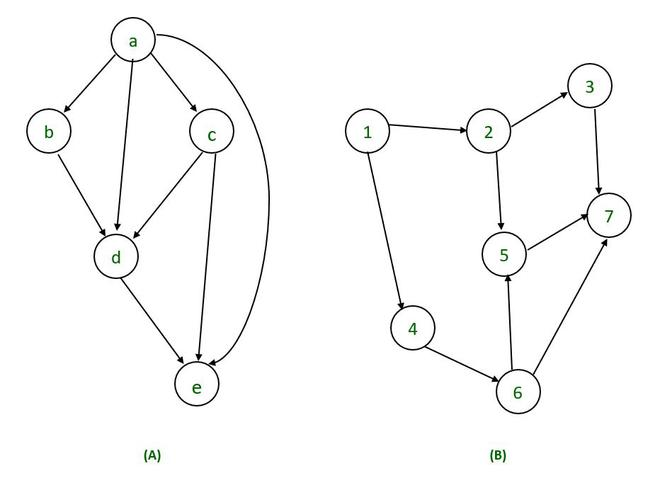


In [18]:
# A class that represents an individual node in a
# Binary Tree
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

# A function to do inorder tree traversal
def printInorder(root):
    if root:
        # First recur on left child
        printInorder(root.left)
        # Then print the data of node
        print(root.val, end=" "),
        # Now recur on right child
        printInorder(root.right)

# A function to do preorder tree traversal
def printPreorder(root):
    if root:
        # First print the data of node
        print(root.val, end=" "),
        # Then recur on left child
        printPreorder(root.left)
        # Finally recur on right child
        printPreorder(root.right)

# A function to do postorder tree traversal
def printPostorder(root):
    if root:
        # First recur on left child
        printPostorder(root.left)
        # The recur on right child
        printPostorder(root.right)
        # Now print the data of node
        print(root.val, end=" "),

# Driver code
if __name__ == "__main__":
    root = Node(1)
    root.left = Node(2)
    root.right = Node(3)
    root.left.left = Node(4)
    root.left.right = Node(5)
 
    # Function call
    print("Inorder traversal of binary tree is")
    printInorder(root)

    # Function call
    print("\nPreorder traversal of binary tree is")
    printPreorder(root)

    # Function call
    print("\nPostorder traversal of binary tree is")
    printPostorder(root)


Inorder traversal of binary tree is
4 2 5 1 3 
Preorder traversal of binary tree is
1 2 4 5 3 
Postorder traversal of binary tree is
4 5 2 3 1 